# Part I - Prosper Load Data Exploration
## by Kenneth Odoh

## Introduction

Prosper is a peer-to-peer lending marketplace in the United States. Borrowers apply online for fixed-rate, fixed-term loans. People and institutions can invest in the loans to earn returns. 

The purpose of this project is to analyze the loan data, and gain deeper insight into audience behaviour and how different factors can influence loan repayment by debtors.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Preliminary Cleanup

Let's clean up the data before our analysis

In [4]:
#Replace Listing Category number with the appropriate value as given in the dictionary below, then convert to categorical datatype.
listing_cat_remap = {
    0: 'Not Available', 1 : 'Debt Consolidation', 2: 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use',
    6: 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 
    11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 
    16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'
              }

df['ListingCategory'] = df['ListingCategory (numeric)'].map(listing_cat_remap).astype('category')
df.drop(columns=['ListingCategory (numeric)'])

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,Not Available
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Home Improvement
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,Not Available
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,Motorcycle
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,Home Improvement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Debt Consolidation
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22,Other
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119,Debt Consolidation
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274,Home Improvement


In [5]:
#Let's combine all PastDue Categories into one base category 'PastDue' (without the deliquency bucket) in order to obtain a cleaner chart.
# Let's also rename 'FinalPaymentInProgress' to 'Final Payment'

remap_cat_dict = {'Completed': 'Completed', 'Current':'Current', 'Cancelled': 'Cancelled', 'Defaulted': 'Defaulted',
             'Chargedoff': 'Chargedoff', 'FinalPaymentInProgress': 'Final Payment', 
              'Past Due (1-15 days)': 'Past Due', 'Past Due (16-30 days)': 'Past Due', 'Past Due (31-60 days)': 'Past Due',
              'Past Due (61-90 days)': 'Past Due', 'Past Due (91-120 days)': 'Past Due', 'Past Due (>120 days)': 'Past Due',
             }
df['LoanStatus'] = df.LoanStatus.map(remap_cat_dict)

In [6]:
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'Final Payment'], dtype=object)

In [7]:
df['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [8]:
#For the IncomeRange column, Let's replace all unspecified values (e.g 'Not employed', 'Not displayed') with 'Not Specified' since that sounds more logical.
df['IncomeRange'].replace('Not employed', 'Not specified', inplace=True)
df['IncomeRange'].replace('Not displayed', 'Not specified', inplace=True)

In [9]:
df['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not specified', '$100,000+',
       '$75,000-99,999', '$1-24,999', '$0'], dtype=object)

In [10]:
#Some variables are better treated as ordered categorical variables since they follow some logical order.
#Let's convert them to ordered categorical variables

ordered_cat_dict = {
    'Term':[12, 36, 60],
    'EmploymentStatus': ['Self-employed', 'Full-time', 'Employed', 'Part-time', 'Retired', 'Not employed', 'Other', 'Not available'],
    'LoanStatus': ['Completed', 'Final Payment', 'Current', 'Past Due', 'Cancelled', 'Defaulted', 'Chargedoff', ],
    'IncomeRange':['Not specified', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+',]
}

for var in ordered_cat_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordered_cat_dict[var])
    df[var] = df[var].astype(ordered_var)
    

#Other unordered categorical data
unordered_cat_list = ['BorrowerState', 'ListingCategory']
for var in unordered_cat_list:
    df[var] = df[var].astype('category')

In [11]:
#Let's clean up the missing values: replace all NaN with 'Not Available' so that they can be used in our plots
df.EmploymentStatus = df.EmploymentStatus.fillna('Not available')
df.EmploymentStatus.value_counts(dropna=False)

Employed         67322
Full-time        26355
Not available     7602
Self-employed     6134
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [12]:
df[df.EstimatedLoss > df.EstimatedReturn].head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,20,Home Improvement
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1,Debt Consolidation
15,0F483544120452347F48121,577164,2012-04-10 09:14:46.297000000,NaN,36,Defaulted,2012-12-19 00:00:00,0.35797,0.3177,0.3077,...,0.0,3790.25,3790.25,0.0,1.0,0,0,0.0,10,Household Expenses
19,0FFC35866018516621B0D3F,875565,2013-08-21 06:49:02.093000000,NaN,60,Current,NaN,0.24754,0.2225,0.2125,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1,Debt Consolidation
22,101735700321773921526BF,706927,2013-01-30 09:36:13.783000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,94,Debt Consolidation


In [13]:
df.IncomeRange.unique()

['$25,000-49,999', '$50,000-74,999', 'Not specified', '$100,000+', '$75,000-99,999', '$1-24,999', '$0']
Categories (7, object): ['Not specified' < '$0' < '$1-24,999' < '$25,000-49,999' < '$50,000-74,999' < '$75,000-99,999' < '$100,000+']

In [15]:
df.IncomeVerifiable.value_counts()

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

In [235]:
df.EmploymentStatus.dtype

CategoricalDtype(categories=['Self-employed', 'Full-time', 'Employed', 'Part-time',
                  'Retired', 'Not employed', 'Other', 'Not available'],
, ordered=True)

### What is the structure of your dataset?

There are 113,937 loan data with 81 features on each loan. These include loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) contains a list of all the variables in the data set, and what they represent.

The Dataset is predominantly numeric in nature, but also contain variables of other datatypes, including ordered factor categorical variables as shown below:

Lowest -----> Highest
Term: 12, 36, 60

Income Range: Not specified, \\$0, \\$1-24,999, \\$25,000-49,999, \\$50,000-74,999, \\$75,000-99,999, \\$100,000+

Best -------> Worst

Loan Status: Completed, Final Payment, Current, Past Due, Cancelled, Defaulted, Chargedoff

Employment Status: Self-employed, Full-time, Employed, Part-time, Retired, Not employed, Other, Not available


### What is/are the main feature(s) of interest in your dataset?

Audience insight. I am very interested in understanding what features are best for predicting loan repayability by the debtors. This dataset provides data on debtor profiles (including some imported, binding information such as credit score, employment status, financial standing, etc). These data will help us gain insights about the debtors, their credibility and other information that will help in either approving or denying furture loan requests (by them or by people sharing similar features with them).


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that some individual factors such as Employment status, Income verifiability status, Listing category, Income range and other factors surrounding terms of borrowing such as Loan term and Total principal borrowed, can influence loan repayment tendencies.

Therefore, my primary dependent variable is __Loan Status__.

## Univariate Exploration

In [17]:
# Define helpful Functions and default parameters for our plots
# aliases for color palletes:
dark = sb.color_palette(palette='dark')
deep = sb.color_palette(palette='deep')
pastel = sb.color_palette(palette='pastel')
color_blind = sb.color_palette(palette='colorblind')

font = {'family': 'Arial',
       'weight': 'light',
       'size': 12,
       }
plt.rc('font', **font, )
# sb.set_theme(style="darkgrid")
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1


def compute_percentages(plot, data, col, orient):
    '''Function to append percentages to each bar of our plot'''
    total = data[col].value_counts().sum()
    if orient == 'h':
        for p in plot.patches:
            percentage = '{:.1f}%'.format(100*p.get_width()/total)
            y = p.get_y() + p.get_height() - 0.15
            x = p.get_width() + (p.get_width()/5)
            plot.annotate(percentage, (x,y), ha='center')
            
    elif orient == 'v':
        for p in plot.patches:
            percentage = '{:.1f}%'.format(100*p.get_height()/total)
            x = (p.get_x() + p.get_width()) - 0.2
            y = p.get_height() - 0.15
            plot.annotate(percentage, (x,y), ha = 'center')

In [19]:
df.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

Let's start by exploring the distribution of our primary variable: Loan Status

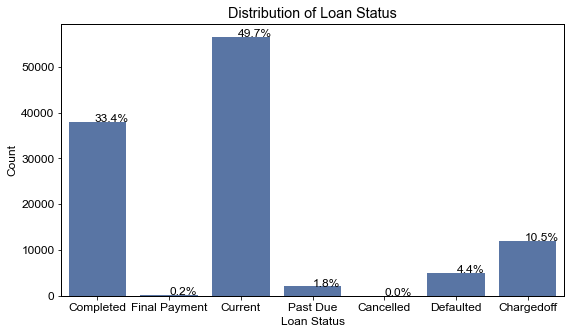

In [109]:
#Distribution by Loan Status
plt.figure(figsize=(9,5), frameon=True)
plot = sb.countplot(data=df, x='LoanStatus', color=deep[0]);
plot.set(title='Distribution of Loan Status', xlabel='Loan Status',ylabel='Count',);
compute_percentages(plot, df, 'LoanStatus', orient='v')

Debtors with __Current__ loan status make up approximately 50% of the population. This is followed by __Completed__ status with about 33% of overall population.

This could be a sign of hope for the business. More fresh debts with (higher recoverability chances) are in circulation than bad debts (ChargedOff, Defaulted, etc.).

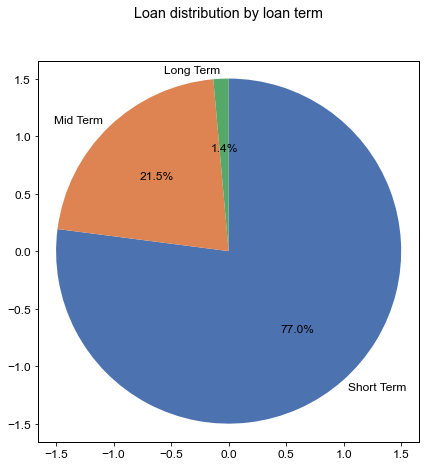

In [239]:
#Loan distribution by loan term
labels = {12 : 'Short Term', 30 : 'Mid Term', 60 : 'Long Term'}
plt.figure(figsize=(7,7))
plot_pie = plt.pie(x=df.Term.value_counts(), frame=True, startangle=90, counterclock=False, labels=labels.values(),
                   labeldistance=1.05, radius=1.5, autopct = "%1.1f%%", colors=deep);
plt.title('Distribution of loan term', y=1.1);

We can see  that __Mid Term__ loan (36 months maximum) is the predominant loan type. 77% of all loans have an ideal span of 36 months.

### But what do they use these loans for?

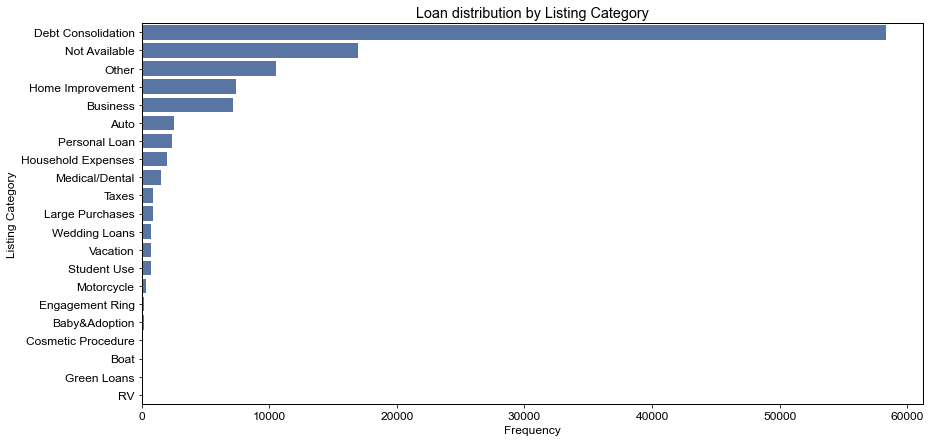

In [20]:
#Loan distribution by Listing Category
figure = plt.figure(figsize=(14,7))
plot = sb.countplot(data=df, y='ListingCategory', order=df.ListingCategory.value_counts().index,  color=deep[0])
plt.title('Loan distribution by Listing Category')
plt.xlabel('Frequency')
plt.ylabel('Listing Category');

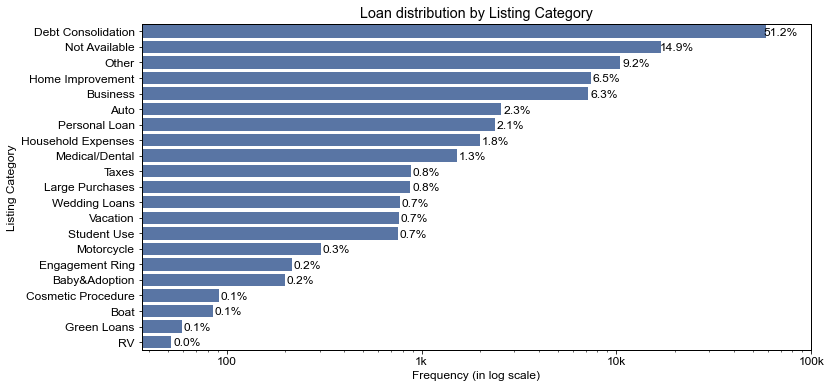

In [22]:
#The variables span over a large range of values. 
#Let's transform using a log scale

figure = plt.figure(figsize=(12, 6))
plot = sb.countplot(data=df, y='ListingCategory', order=df.ListingCategory.value_counts().index,  color=deep[0])
plt.title('Loan distribution by Listing Category')
plot.set(xscale="log")
plt.xticks([100, 1e3, 1e4, 1e5], ['100', '1k', '10k', '100k'])
plt.xlabel('Frequency (in log scale)')
plt.ylabel('Listing Category');

compute_percentages(plot, df, 'ListingCategory', orient='h')

As shown above, 51% of all debtors selected __Debt Consolidation__ (borrowing to offset other debts) as their reason for borrowing. Just about 6% of these loans were used for business purposes. Other reasons for borrowing include home improvement, auto (repair/purchase), health care, etc. Summarily, a bulk of our customers borrow to __spend__, not __invest__. Borrowing to offset other debts is okay, as far as there is a guarantee they will pay back in due time. A further study of how each listing category influences loan repayment would have exposed more insights, but we shall be discontinuing with this evaluation for now.

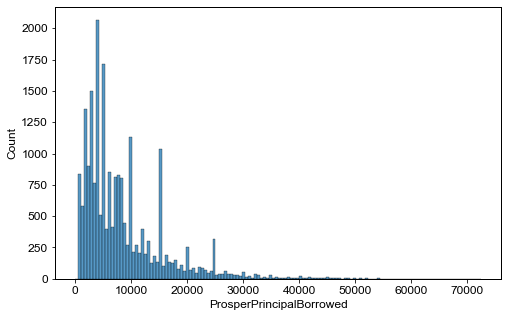

In [242]:
#Distribution of Loan Principal
plt.figure(figsize=(8,5))
plot = sb.histplot(data=df, x='ProsperPrincipalBorrowed')

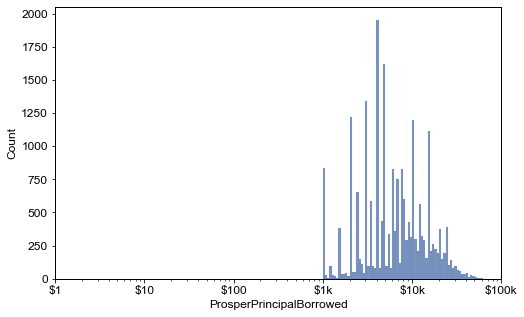

In [243]:
# there's a long tail in the distribution, so let's put it on a log scale instead
plt.figure(figsize=(8,5))
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(df['ProsperPrincipalBorrowed'].max())+log_binsize, log_binsize,)
plot = sb.histplot(data=df, x='ProsperPrincipalBorrowed', bins=bins, color=deep[0])
plt.xscale('log')
plt.xticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5], ['$1', '$10', '$100', '$1k', '$10k', '$100k']);

Principal Borrowed has a long tail distribution with a peak shifting towards the left. This implies that there are a lot of borrowers on the low range (i.e, below \\$10k)

Let's look at Income Verifiability

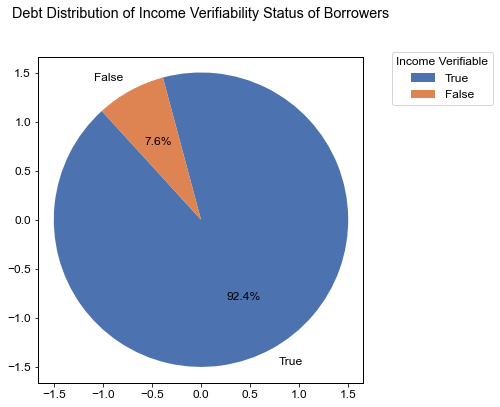

In [110]:
#Income Verifiability distribution
labels = [True, False]
fig = plt.figure(figsize=(6,6))
plot = plt.pie(x=df.IncomeVerifiable.value_counts(), frame=True,startangle=105, counterclock=False, radius=1.5, colors=deep,
                  labels = labels, autopct = "%1.1f%%")
plt.title('Debt Distribution of Income Verifiability Status of Borrowers', y=1.1)
plt.legend(title='Income Verifiable', bbox_to_anchor=(1.05, 1.05), loc='best', borderaxespad=1,);

Over 92% of the debtors have verifiable sources of income.

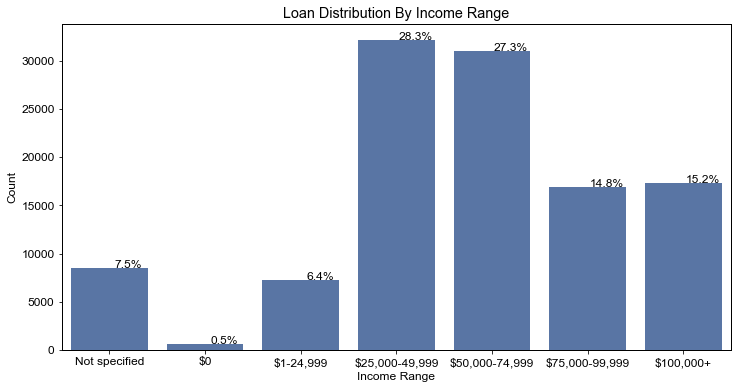

In [112]:
#Income Range
plt.figure(figsize=(12,6))
plot = sb.countplot(data=df, x='IncomeRange', color=deep[0])
plt.title('Loan Distribution By Income Range')
plt.xlabel('Income Range')
plt.ylabel('Count')
compute_percentages(plot, df, 'IncomeRange', 'v')

About 85% of borrowers have at least, \\$25k as income.

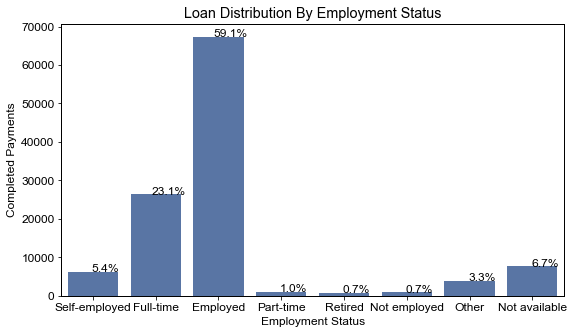

In [432]:
total_borrowings = float(len(df.EmploymentStatus))
figure = plt.figure(figsize=(9,5))
plot = sb.barplot(data=df, x=df.EmploymentStatus.value_counts().index, y=df.EmploymentStatus.value_counts().values, color=deep[0], )
plt.title('Loan Distribution By Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Completed Payments')
compute_percentages(plot, df, 'EmploymentStatus', orient='v')

About 87.6% of debtors are at least, Employed. This is good news too. Even though our debtors largely borrow to spend, it is a sign of hope since the majority of them have an established source of income! But does having a source of income mean one is most likely to pay?
Also, how many of these people have a __Verifiable__ source of income?
Among those who have completed there payments, which Employment Status category is the dominant? 

In our multivariate analysis, we shall be analysing how _being employed_, with _verifiable_ source of income relates with loan status.

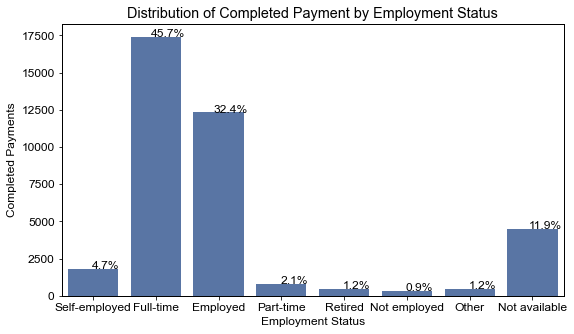

In [27]:
#Distribution of completed payment by Employment status
# A table for only those that have completed their payments

df_completed = df[df.LoanStatus == 'Completed']
figure = plt.figure(figsize=(9, 5))
plot = sb.countplot(data=df_completed, x=df_completed.EmploymentStatus, color = deep[0])
plt.title('Distribution of Completed Payment by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Completed Payments')
compute_percentages(plot, df_completed, 'LoanStatus', 'v')

Again, we can confirm that __82.8%__ of all completed payments were done by those who are at least, __Employed__

Now, numbers could mislead us. Given that the majority of borrowers are at least, __Employed__, let's look at the proportions. Let's see how each category of debtors is complying with debt repayment, relative to total number of debtors in that category. This will help us see if lack of source of income (perhaps because they are unemployed, retired, etc.), could be a factor to make one not to repay their debt.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Prosper Principal Borrowed had a widely varied distribution. It had a long tail towards the right of the plot. I performed a log scale transformation to obtain a more uniform distribution.

Also, the listing categories had an uneven distribution. 51% of total population fell under the Debt Consolidation category. A log scale was also applied to it to obtain a more even distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

A preliminary cleaning operation was performed on the dataset. The primary operation performed was to transform columns to their most suitable datatypes for this analysis. The following columns were transformed from strings to ordered categorical data types:
- Income Range
- Loan Status
- Employment Status.

In addition, the Listing Category column was remaped to reflect their description in the dictionary [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0). e.g __0__ is represented as __Not Avavilable__, __1__ represented as __Debt Consolidation__, etc.

## Bivariate Exploration

#### Back to our former question:  does having a source of income mean one is most likely to repay their loans?

In [26]:
#Transform the Loan Status column from long to wide form, and group them by Employment Status.
#Then compute the proportion of count of each cell to the overall item in the row. Hint: Each row sums up to approximately 1.
prop_df = pd.crosstab(index=df.EmploymentStatus, columns=df.LoanStatus, normalize='index')
prop_df

LoanStatus,Completed,Final Payment,Current,Past Due,Cancelled,Defaulted,Chargedoff
EmploymentStatus,,,,,,,
Self-employed,0.290675,0.001630,0.502934,0.018422,0.000000,0.040104,0.146234
Full-time,0.660102,0.000379,0.049934,0.002694,0.000038,0.084121,0.202732
Employed,0.183179,0.002629,0.726791,0.025623,0.000000,0.009358,0.052420
Part-time,0.729779,0.000000,0.022059,0.007353,0.000000,0.055147,0.185662
Retired,0.577358,0.000000,0.115723,0.007547,0.000000,0.072956,0.226415
Not employed,0.411976,0.000000,0.297006,0.031138,0.000000,0.032335,0.227545
Other,0.117972,0.002102,0.757225,0.031004,0.000000,0.014188,0.077509
Not available,0.594054,0.000000,0.000000,0.000000,0.000526,0.227046,0.178374


Let's plot a stacked bar chart showing the proportion of each Loan status for each employment status, and selectively label significant sub-bars.

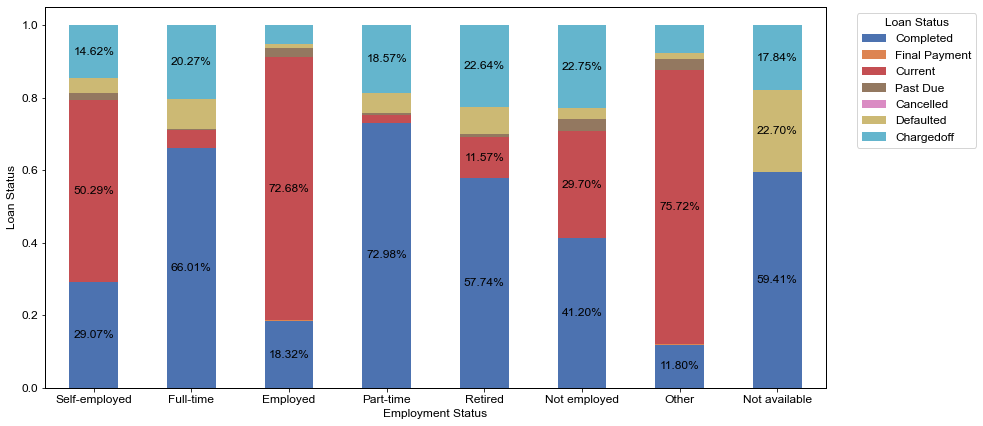

In [28]:
color_list  = ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860', '#DA8BC3', '#8C8C8C', '#CCB974', '#64B5CD']
cmap = ListedColormap(sb.color_palette(color_list).as_hex())

plot = prop_df.plot(kind='bar', stacked=True, figsize=(14,7), colormap=cmap, rot=0)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), title ='Loan Status')
plt.xlabel('Employment Status')
plt.ylabel('Loan Status')

ax = plt.gca()
for p in ax.get_children()[:-1]:
    if isinstance(p, Rectangle):
        x, y = p.get_xy()
        w, h = p.get_width(), p.get_height()
        if h > 0.1:
            ax.text(x+0.5*w, y+0.5*h, '{:.2f}%'.format(h*100), va='center', ha='center',  color = 'black', fontsize=12, fontweight='light')

In the above chart, I have selectively labeled the bars so that we can focus on those with significant message to pass across. Looking at the loan completement rate of each of the emplpoyment statuses, it is hard to tell because even the retired and the unemployed have quite impressive loan completement rates too. However, when we look instead at the last rows of each bar, we can see the impact of Employment status on loan status.

Notably, the __Not Employed__ have the highest __Chargeoffs__, followed by the __Retired__. They are closely followed by the Full-time employed too. However, the latter also have high loan Completement rate.
Chargeoff is a sign of one's inability to repay their loans. Thus, as expected, the unemployed leads the crew, followed by the Retired. So it is okay to say at this point that Employment Status can affect Loan repayment.

Even though the __Employed__ also have one of the lowest completment rates, an explanation to this is not far fetched. They have some of the highest loans still in progress (__Current__). Employed workers are known for accumulating debt, to pay up by month end. Thus, the time of the month when the data was pulled out, as well as the loan terms can have a significant influence here. As we can see, they have some of the lowest bad records (__Chargeoff and Defaulted__ loans). Same can be said of the Self-employed.

In the chart above, we have masked off the effect of unequal distribution of data among the different Employment categories. We have put all the categories on a scale, and evaluated their proportional effect to loan repayment. We can make the visual more appealing using a heatmap instead.

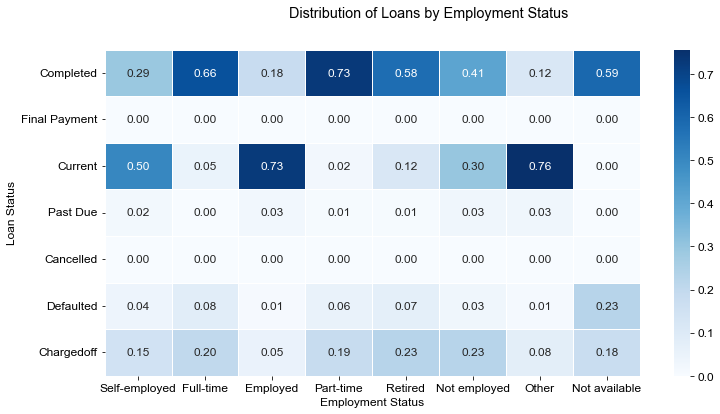

In [108]:
plt.figure(figsize=(12,6))
# colormap = sb.
sb.heatmap(data=prop_df.transpose(), linewidths=1, linecolor='w', annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Employment Status')
plt.ylabel('Loan Status')
plt.suptitle('Distribution of Loans by Employment Status')
plt.xticks(rotation = 0);

Moving from left to right of the above chart, we can see that __Retired__ and __Not employed__ have the highest chargeoff rates. __Not available__ has the highest loan default rate, but we wouldn't consider this since it is not a definite category. As we approach the top of the chart, the pattern starts to change. Loan completment rate decreases from left to right (with the exception of these two special categories: __Other__ and __Not available__). Loan completement rate reached a peak at __Part-time__, but started declining from __Retired__ rightwards.

Below is another distribution showing the impact of employment status on loan status, without the bias of uneven distribution of population

<Figure size 864x864 with 0 Axes>

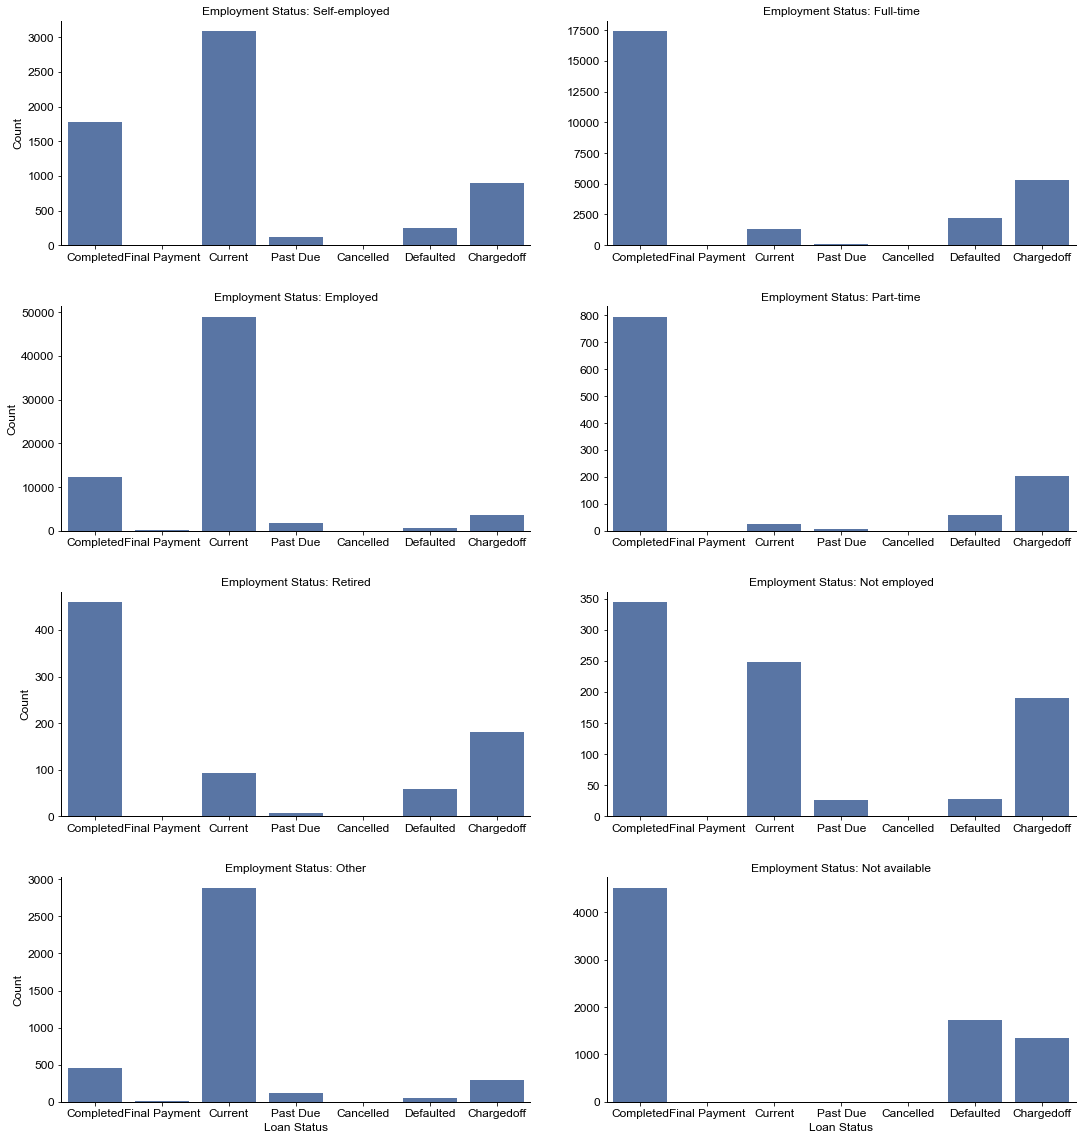

In [462]:
fig = plt.figure(figsize=(12,12))
cp = sb.catplot(x='LoanStatus', col='EmploymentStatus', kind='count', data=df, height=4, aspect=1.9, 
                col_wrap=2, sharey=False, sharex=False, color=deep[0],)
cp.set_axis_labels('Loan Status', 'Count')
cp.set_titles(col_template="Employment Status: {col_name}") 
plt.tight_layout(h_pad=2.5, w_pad=3);

Here, we can see that there is a high compliance with loan repayment across all Employment Status categories.

- Part-time workers showed the highest loan repayment at __73%__
- Those in the category of __OTHER__ showed the least compliance at 11.8%

However, about __40.5%__  of those with unknown Employment status (__Not Available__) have either __Defaulted__ or __Charged off__ debt. 

People who did not indicate their employment status are probably unsincere, and very likely not to clear their debt. Thus, further scrutiny should be put in place when considering future loan request for people in that category.

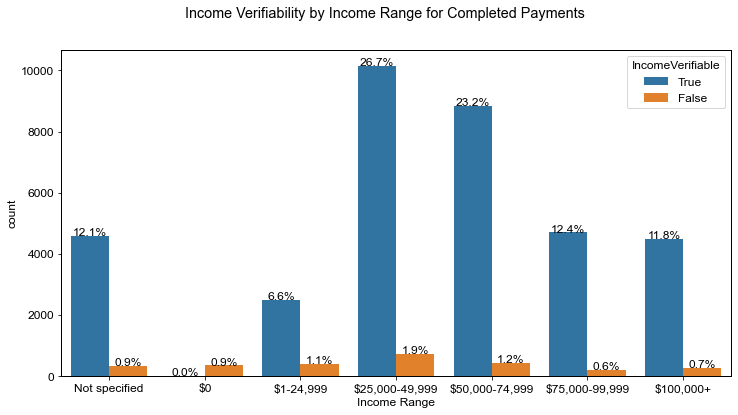

In [444]:
plt.figure(figsize=(12,6))
plot = sb.countplot(data=df_completed, x='IncomeRange', hue='IncomeVerifiable', hue_order=[True, False])
plt.xlabel('Income Range')
plt.suptitle('Income Verifiability by Income Range for Completed Payments')
compute_percentages(plot, df_completed, 'IncomeRange', 'v')

The chart above is a distribution of Loan Status by Income Range, but only for the completed payments.
We can see that across most income ranges, those with verifiable income status are dominant

But how does income verifiability affect other loan status? In the multivariate analysis section of this work, we shall investigate the combined effect of income verifiability and employment status on loan status. For now, let's explore income verifiability further.

### How is Income Verifiability distributed across loan terms?

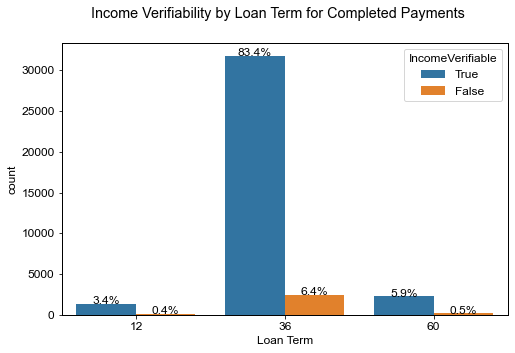

In [445]:
plt.figure(figsize=(8,5))
plot = sb.countplot(data=df_completed, x='Term', hue='IncomeVerifiable', hue_order=[True, False])
plt.xlabel('Loan Term')
plt.suptitle('Income Verifiability by Loan Term for Completed Payments')
compute_percentages(plot, df_completed, 'Term', 'v')

92.7% of all debtors with completed payments have verifiable income status.
Among these categories, the mid-term debtors are dominant. But remember that mid term borrowers are the dominant population too.

### How does income verifiability distribute across different loan amounts?
It will be worth finding out in who's hands are the larger bucks of the business capital. Are the high-end borrowers also the most verified or not?

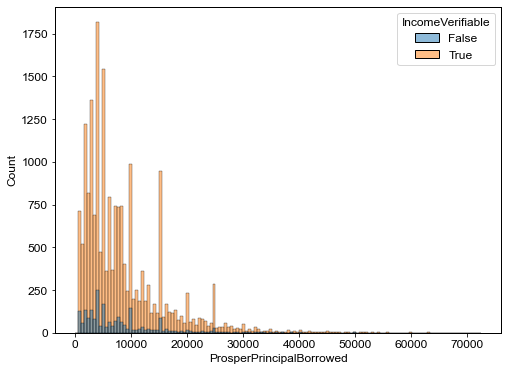

In [297]:
# Loan Principal by Income Verifiability
plt.figure(figsize=(8,6))
plot = sb.histplot(data=df, x='ProsperPrincipalBorrowed', hue='IncomeVerifiable')

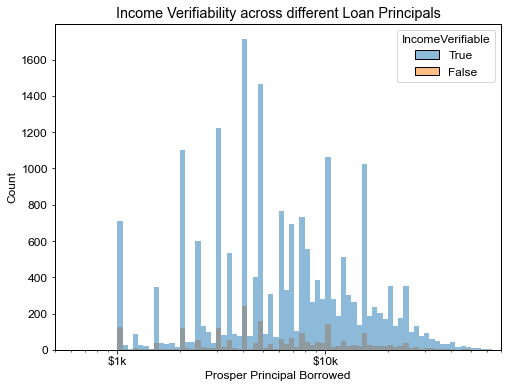

In [107]:
#There is a long-tail in the chart above, so once again, let's apply a log scale, and cut off outliers on both sides of the chart.
plt.figure(figsize=(8,6))
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['ProsperPrincipalBorrowed'].max())+log_binsize, log_binsize,)

plot = sb.histplot(data=df, x='ProsperPrincipalBorrowed', hue='IncomeVerifiable', bins=bins, color=dark, hue_order=[True, False])
plt.xscale('log')
plt.xticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5], ['$1', '$10', '$100', '$1k', '$10k', '$100k'])
plt.xlabel('Prosper Principal Borrowed')
plt.title('Income Verifiability across different Loan Principals')
plt.xlim(500, 70000);

We can see from the distribution that the the majority of our debtors have verifiable income statuses. More interestingly, we can see peaks distributed across different principal ranges. this shows that there are more debtors with verified income than those with out, irrespective of the loan amount borrowed.

In [24]:
df.ProsperPrincipalBorrowed.sample(5)

71033       NaN
60697       NaN
81157       NaN
29458       NaN
70424    1700.0
Name: ProsperPrincipalBorrowed, dtype: float64

### How does Principal borrowed affect loan repayment?
To avoid overplotting, let's break up the borrowed principals into intervals as shown below.

In [75]:
bin_edges = np.arange(0, df.ProsperPrincipalBorrowed.max()+1, 10000)
bin_names = ['0-9.99k', '10k-19.99k', '20k-29.99k', '30k-39.99k', '40k-49.99k', '50k-59.99k','60k-69.99k',]
df['PrincipalRange'] = pd.cut(df['ProsperPrincipalBorrowed'], bin_edges, labels=bin_names)

pd.api.types.CategoricalDtype(ordered = True, categories = bin_names)

CategoricalDtype(categories=['0-9.99k', '10k-19.99k', '20k-29.99k', '30k-39.99k',
                  '40k-49.99k', '50k-59.99k', '60k-69.99k'],
, ordered=True)

In [80]:
df.PrincipalRange.sample(n=5)

22358    10k-19.99k
24153           NaN
52126       0-9.99k
59423           NaN
9398            NaN
Name: PrincipalRange, dtype: category
Categories (7, object): ['0-9.99k' < '10k-19.99k' < '20k-29.99k' < '30k-39.99k' < '40k-49.99k' < '50k-59.99k' < '60k-69.99k']

Let's extract only completed payments and see the distribution by principal range.

In [81]:
df_completed_2 = df[df.LoanStatus == 'Completed']
df_completed_2['LoanStatus'].nunique()

1

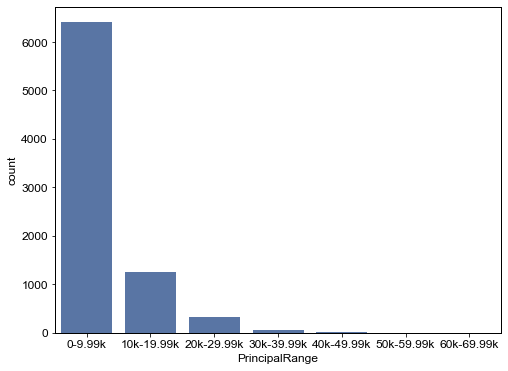

In [82]:
plt.figure(figsize=(8,6))
plot = sb.countplot(data=df_completed_2, x='PrincipalRange', color=deep[0])

There are more debtors in the lower principal range (< \\$10k) than those in the higher ranges. Let's look at the proportions instead.

In [83]:
#We transform the dataframe to long form again to plot the proportions instead.
prop_df_2 = pd.crosstab(index=df.PrincipalRange, columns=df.LoanStatus, normalize='index')
prop_df_2

LoanStatus,Completed,Final Payment,Current,Past Due,Defaulted,Chargedoff
PrincipalRange,,,,,,
0-9.99k,0.396916,0.002291,0.445594,0.028488,0.024772,0.101938
10k-19.99k,0.293732,0.003508,0.602900,0.025725,0.013564,0.060571
20k-29.99k,0.261107,0.003897,0.650818,0.024162,0.013250,0.046765
30k-39.99k,0.247059,0.003922,0.690196,0.015686,0.003922,0.039216
40k-49.99k,0.172043,0.010753,0.795699,0.000000,0.000000,0.021505
50k-59.99k,0.173913,0.043478,0.739130,0.000000,0.043478,0.000000
60k-69.99k,0.166667,0.000000,0.833333,0.000000,0.000000,0.000000


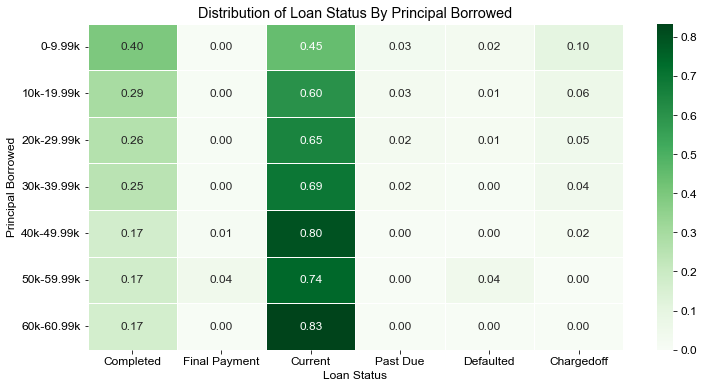

In [56]:
plt.figure(figsize=(12,6))
sb.heatmap(data=prop_df_2, linewidths=1, linecolor='w', annot=True, fmt='.2f', cmap='Greens')
plt.ylabel('Principal Borrowed')
plt.xlabel('Loan Status')
plt.title('Distribution of Loan Status By Principal Borrowed')
plt.xticks(rotation = 0);

As we move down the first column, the saturation decreases, signifying a negative correlation between principal borrowed and loan repayment. An opposite trend could be observed in the third column (__Current__). However, we are only interested in completed payments here.

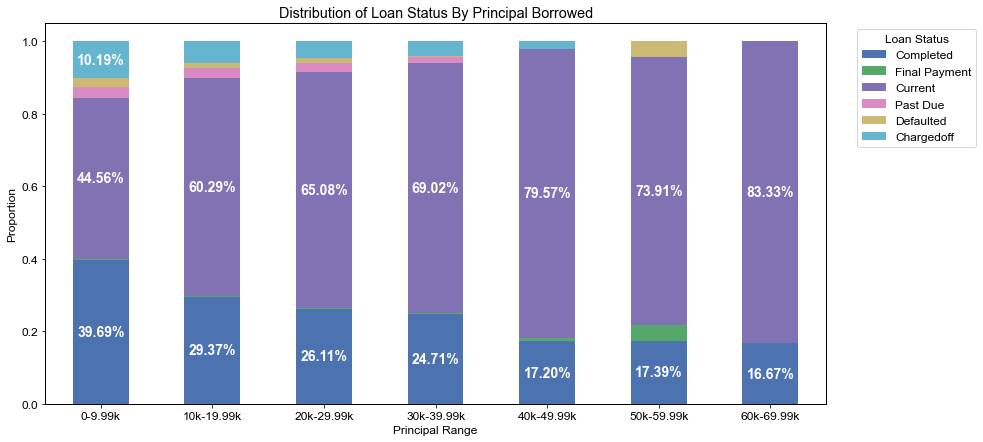

In [106]:
color_list  = ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860', '#DA8BC3', '#8C8C8C', '#CCB974', '#64B5CD']
cmap = ListedColormap(sb.color_palette(color_list).as_hex())

plot = prop_df_2.plot(kind='bar', stacked=True, figsize=(14,7), colormap=cmap, rot=0 )
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), title ='Loan Status')
plt.xlabel('Principal Range')
plt.ylabel('Proportion')
plt.title('Distribution of Loan Status By Principal Borrowed')

ax = plt.gca()
for p in ax.get_children()[:-1]:
    if isinstance(p, Rectangle):
        x, y = p.get_xy()
        w, h = p.get_width(), p.get_height()
        if h > 0.1:
            ax.text(x+0.5*w, y+0.5*h, '{:.2f}%'.format(h*100), va='center', ha='center',  color = 'white', fontsize=14, fontweight='bold')

Let's focus on the blue bars at the base of the chart above. As we shift towards the right, the loan completment rate decreases. Those in the lower loan categories tend to pay up more than those in the higher loan categories.

At the same time, we can see an opposite trend when we look at the loan charge off rate. The low-principal debtors have higher chargeoff rate than the high principal debtors. Thus, the impact is double-sided. The charts below visualizes more clearly, the double-sided effect of principal borrowed on loan status.

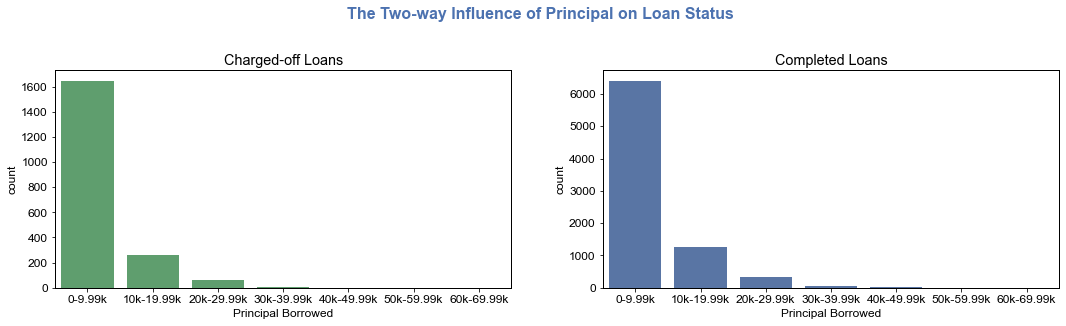

In [94]:
df_defaulted = df[df.LoanStatus == 'Chargedoff']
figure = plt.figure(figsize=(18,4))
figure.suptitle('The Two-way Influence of Principal on Loan Status', y=1.1, fontsize=16, fontweight='bold', color=deep[0])
# figure.
plt.subplot(1, 2, 1)
plot = sb.countplot(data=df_defaulted, x='PrincipalRange', color=deep[2])
plot.set(title='Charged-off Loans', xlabel='Principal Borrowed')
plt.subplot(1, 2, 2)
plot = sb.countplot(data=df_completed_2, x='PrincipalRange', color=deep[0])
plot.set(title='Completed Loans', xlabel='Principal Borrowed');

We can see that the two charts above have identical shapes. As the principal borrowed increasess, the chargeoff rate increases. The same is true for loan completement rate.

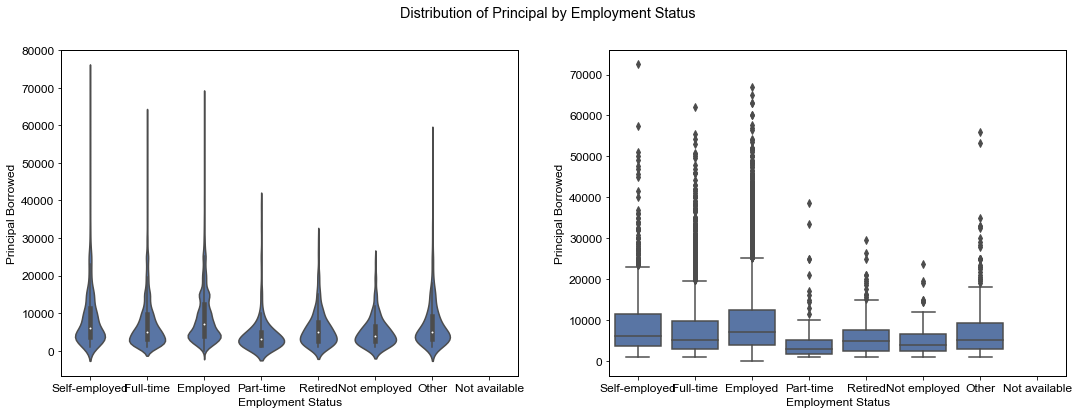

In [95]:
#Principal Distribution by Employment Status
fig = plt.figure(figsize=(18,6))
plt.suptitle('Distribution of Principal by Employment Status')
plt.subplot(1, 2, 1)
plot = sb.violinplot(data = df, x='EmploymentStatus', y='ProsperPrincipalBorrowed', color=deep[0])
plt.ylabel('Principal Borrowed')
plt.xlabel('Employment Status')

plt.subplot(1, 2, 2)
plot = sb.boxplot(data = df, x='EmploymentStatus', y='ProsperPrincipalBorrowed', color=deep[0])
plt.ylabel('Principal Borrowed')
plt.xlabel('Employment Status');

From the charts above, we can see that those in the __Employed__ category (Self-employed, Employed, Full-time) borrow the highest amounts. This is quite understandable. Having a source of income gives higher confidence for anyone wanting to take a loan. Perhaps, a good number of them (especially the self-employed) are using it for business purposes. Others who are not into business, borrow to foot bills, with the hope to repay once they get paid their salaries.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

So far, we have seen that __Employment status__ have some effects on loan repayment. While we could not establish a direct relationship between Employment status and loan repayment, it was discovered that debtors with little or no source of income (__Not employed__ or __Retired__) have the highest loan chargeoff and loan defaulting rates.

It was also observed from the dataset of all completed payments that across all income ranges, debtors with verifiable source of income have the highest tendencies to repay their loans. 

The principal borrowed also have a negative relationship with loan repayment rate. Debtors in the low-principal ranges completed more payments than those in the high-principal ranges. But counterintuitively, the loan chargeoff rate also drecreased with increase in principal borrowed.  This means that while the low-principal borrowers are most likely to repay their loans, they also display higher tendencies to default payment, pay past due dates or incure loan charge offs.

Another explanation to this is that lenders are  more likely to write off smaller loans than bigger ones.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
In terms of income range, most of the debtors belong to the mid-class (\\$25k - \\$74k). Even at that, the high income earners still significantly out numbered the low income earners. Similar trend still holds in terms of employment status. The employed borrowed the highest amounts.

## Multivariate Exploration

<Figure size 864x864 with 0 Axes>

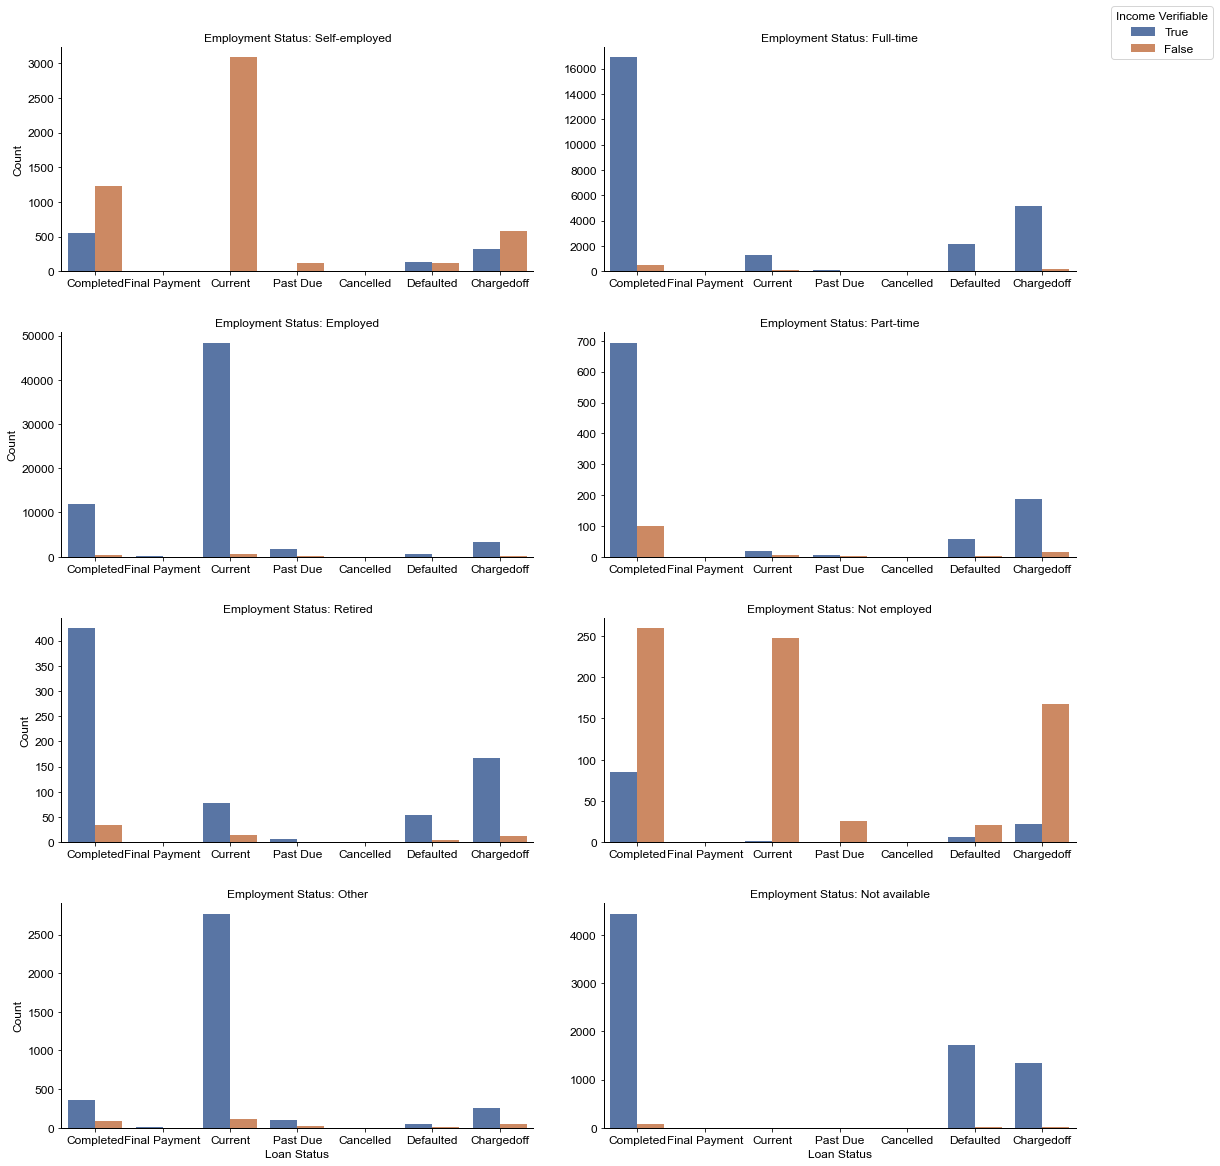

In [438]:
fig = plt.figure(figsize=(12,12))
cp = sb.catplot(x='LoanStatus', col='EmploymentStatus', hue='IncomeVerifiable', kind='count', data=df, height=4, aspect=1.9, 
                col_wrap=2, sharey=False, sharex=False, color='b', palette=deep, legend=False, hue_order=[True, False])

cp.set_axis_labels('Loan Status', 'Count')
cp.set_titles(col_template="Employment Status: {col_name}")  

plt.tight_layout(h_pad=2.5, w_pad=2.5)
plt.legend(title='Income Verifiable', bbox_to_anchor=(1.05, 5.05), loc='upper left', borderaxespad=1,);

From the multivariate chart above, we can once again confirm the influence of income verifiability on loan repayment.
Most of the completed payments were performed by debtors with verifiable income sources. The few exceptions to these are the __Self-employed__ and the __Not employed__.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

For the __Not employed__, income verifiability is not required in the first place. For the __Self employed__, it is usually much harder to show proof. Many self-employed individuals usually operate their own businesses. For some shrewed reasons, not many of them are willing to open up their income source because of tax avoidance and other personal reasons.

## Conclusions
Following the Question Visualisation Observation approach, we have gained some insights into our audience, and how different features can influence loan repayability.The primary focus of this analysis was to study what factors could influence loan status. We started with basic visualizations to first understand the distributions of our data. Afterwards, some bivariate analysis were conducted to study the relationships between different variables, and our primary variable of interest __Loan Status__.

Debtors income status, employment status, principal borrowed and income verifiability status, all have a combined effect on loan status. As we know, one of the golden rules of investing is to ensure the safety of your capital first. Lenders should look into these factors whenever a loan request is under consideration.